In [1]:
import numpy as np
import pandas as pd

from pydataset import data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

from wrangle import wrangle_telco
import split_scale as ss
import explore as ex
import evaluate as ev

### 1. Load the tips dataset.

- a. Create a column named tip_percentage. This should be the tip amount divided by the total bill.
- b. Create a column named price_per_person. This should be the total bill divided by the party size.
- c. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?
- d. Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?
- e. Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?
- f. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

In [2]:
tips = data("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# a. Create a column named tip_percentage.
# This should be the tip amount divided by the total bill.
tips["tip_percentage"] = tips["tip"] / tips["total_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [4]:
# b. Create a column named price_per_person.
# This should be the total bill divided by the party size.
tips["price_per_person"] = tips["total_bill"] / tips["size"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,9.676667
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,13.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,11.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,8.910000


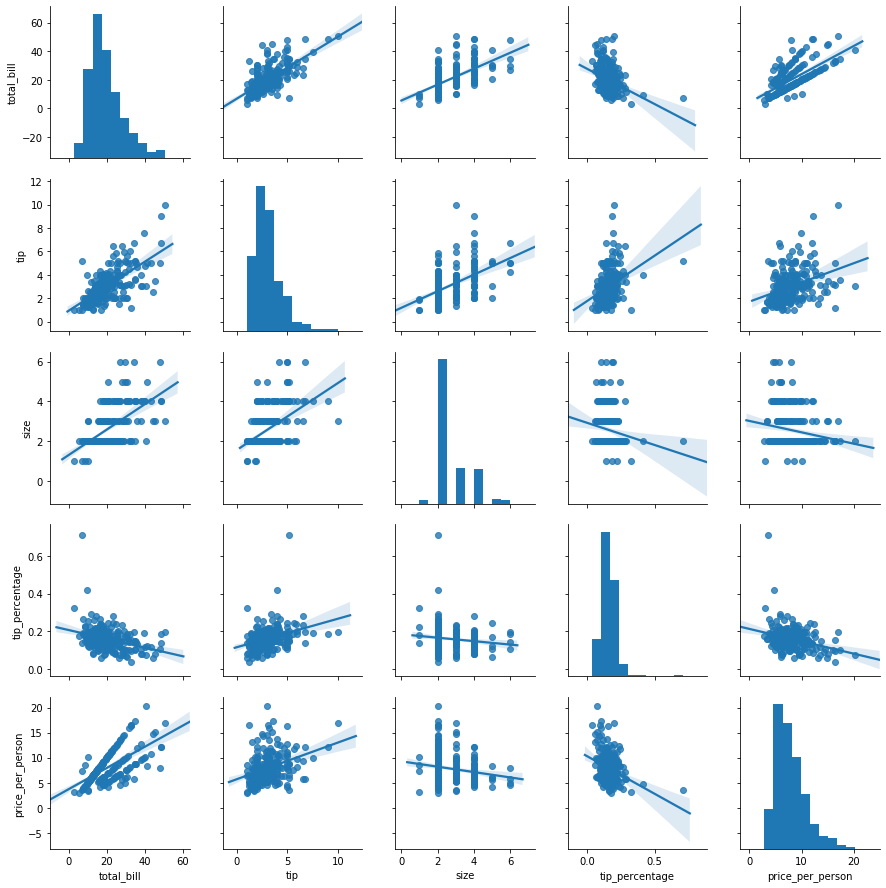

In [5]:
# c. Before using any of the methods discussed in the lesson,
# which features do you think would be most important for
# predicting the tip amount? The tip percentage?
sns.pairplot(data=tips, kind="reg")
plt.show()

In [17]:
# d. Use all the other numeric features to predict tip amount.
# Use select k best and recursive feature elimination to select the
# top 2 features. What are they?
tips = tips.drop(columns=["sex", "smoker", "day", "time"])
tips

,total_bill,tip,size,tip_percentage,price_per_person
1,16.99,1.01,2,0.059447,8.495000
2,10.34,1.66,3,0.160542,3.446667
3,21.01,3.50,3,0.166587,7.003333
4,23.68,3.31,2,0.139780,11.840000
5,24.59,3.61,4,0.146808,6.147500
...,...,...,...,...,...
240,29.03,5.92,3,0.203927,9.676667
241,27.18,2.00,2,0.073584,13.590000
242,22.67,2.00,2,0.088222,11.335000
243,17.82,1.75,2,0.098204,8.910000


In [20]:
train, test = ss.split_my_data(tips, .8, 56)

In [21]:
train.shape

(195, 5)

In [22]:
test.shape

(49, 5)

In [23]:
# For the feature engineering methods,
# we want to use the scaled data
scaler, train, test = ss.standard_scaler(train, test)

In [24]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
train.head()

,total_bill,tip,size,tip_percentage,price_per_person
3,0.122108,0.292835,0.469692,0.048355,-0.325697
99,0.122108,-0.056717,-0.607837,-0.328668,0.887011
155,-0.016458,-0.755822,1.547221,-0.988125,-1.039411
196,-1.380890,-1.147321,-0.607837,0.426815,-1.442012
61,0.041650,0.090095,-0.607837,-0.084426,0.762335


In [26]:
test.head()

,total_bill,tip,size,tip_percentage,price_per_person
13,-0.502558,-1.056437,-0.607837,-0.977789,-0.080962
43,-0.667944,-0.014771,-0.607837,0.886818,-0.337241
126,1.104365,0.782209,3.702279,-0.357970,-1.031042
202,-0.802040,-0.748831,-0.607837,-0.091321,-0.545035
127,-1.273613,-1.119356,-0.607837,0.161179,-1.275777


> Question: I thought we were not going to scale our target variable?

In [42]:
X_train = train.drop(columns="tip")
X_test = test.drop(columns="tip")
y_train = train[["tip"]]
y_test = test[["tip"]]

In [43]:
X_train

,total_bill,size,tip_percentage,price_per_person
3,0.122108,0.469692,0.048355,-0.325697
99,0.122108,-0.607837,-0.328668,0.887011
155,-0.016458,1.547221,-0.988125,-1.039411
196,-1.380890,-0.607837,0.426815,-1.442012
61,0.041650,-0.607837,-0.084426,0.762335
...,...,...,...,...
163,-0.414278,0.469692,-0.636148,-0.879814
193,0.952389,-0.607837,-1.164758,2.173601
144,0.797060,3.702279,0.337569,-1.189773
229,-0.741697,-0.607837,0.654045,-0.451528


In [44]:
X_test.shape

(49, 4)

In [45]:
y_train

,tip
3,0.292835
99,-0.056717
155,-0.755822
196,-1.147321
61,0.090095
...,...
163,-0.755822
193,-0.364323
144,1.341493
229,-0.252466


In [48]:
y_test.shape

(49, 1)

In [49]:
# initialize f_selector object
f_selector = SelectKBest(f_regression, k=2)

In [50]:
# fit object to data
f_selector.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=2, score_func=<function f_regression at 0x12a421710>)

In [59]:
# transform DataFrame
X2 = f_selector.transform(X_train)

In [63]:
print(X2.shape)
print(X_train.shape)

(195, 2)
(195, 4)


In [65]:
# get list of selected features
f_support = f_selector.get_support()
f_support # mask

array([ True,  True, False, False])

In [67]:
# use .loc with mask to subset selected features
f_feature = X_train.loc[:, f_support].columns.tolist()
f_feature

['total_bill', 'size']